# Pre-processing

In [50]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
import ast
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.corpus.stopwords.words('indonesian')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
import preprocessor as p
from ekphrasis.classes.segmenter import Segmenter

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajadalimunthe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajadalimunthe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rajadalimunthe/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rajadalimunthe/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajadalimunthe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## import lexicon data

In [43]:
lexicon = pd.read_csv("lexicon/modified_full_lexicon.csv")
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']
lexicon.head()

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1


## Import Data Sentimen 

In [44]:
df = pd.read_excel('sentimen_mentah.xlsx')
df = df.drop_duplicates()
df = df.dropna(subset=['content'])
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,content
0,0,Semoga g omicron ya Tuhan
1,1,"@dinagustavsson Ada delta,omicron ,cacar munyu..."
2,2,Ayo sukseskan vaksinasi Covid-19 dengan melaku...
3,3,Agar terhindar dr varian baru omicron BA.4 &am...
4,4,"Ambil baik nya, pas kenapa omicron, pertama bi..."


In [45]:
df['hashtag'] = df['content'].apply(lambda x: re.findall(r"#(\w+)", x))

for i,v in enumerate(df['content']):
    df.loc[i,'content'] = p.clean(v)
def preprocess_data(data):
    #Removes Numbers
    data = data.astype(str).str.replace('\d+', '')
    lower_text = data.str.lower()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer =  TweetTokenizer()
 
    def lemmatize_text(text):
        return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]
    
    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words
 
    words = lower_text.apply(lemmatize_text)
    words = words.apply(remove_punctuation)
    return pd.DataFrame(words)

pre_tweets = preprocess_data(df['content'])
df['content'] = pre_tweets
stop_words = set(stopwords.words('indonesian'))
df['content'] = df['content'].apply(lambda x: [item for item in x if item not in stop_words])
df['content'] = df['content'].str.join(" ")
from ekphrasis.classes.segmenter import Segmenter
# segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")
a = []
for i in range(len(df)):
    if any(h in df['hashtag'][i] for h in a):
        listToStr1 = ' '.join([str(elem) for elem in df['hashtag'][i]])
        df.loc[i,'Segmented#'] = seg_tw.segment(listToStr1)
df['content']

/var/folders/h4/y51j_l2s31v014vfsgrs3tgm0000gn/T/ipykernel_16133/3431441387.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.astype(str).str.replace('\d+', '')


Reading twitter - 1grams ...
Reading twitter - 2grams ...


/opt/anaconda3/lib/python3.9/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


0                                semoga g omicron ya tuhan
1        delta omicron cacar munyuk sampe hiv akibat va...
2        ayo sukseskan vaksinasi covid vaksin dosis len...
3        terhindar dr varian omicron ba ba masyarakat d...
4        ambil nya pa omicron account tik tok haha tik ...
                               ...                        
21612    yg blm vaksin lengkap booster vaksin ya sob te...
21613    kk covid original anjay ori wkwkw sampe dah va...
21614    bener skrng lg musim pancaroba ya yg emang mus...
21615                 omicron anjing kakak sepupu gue kena
21616    ask gejala omicron tuh yg bener valid apasi co...
Name: content, Length: 21617, dtype: object

In [47]:
import ast 
file_2 = open("cleaning_source/update_combined_slang_words.txt", "r")
content2 = file_2.read()
slang_words = ast.literal_eval(content2)
file_2.close()

def convert_word(data):
    word_tokens = word_tokenize(data)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]
            
    filtered_tweet = [w for w in word_tokens]
    filtered_tweet = []
    
    for w in word_tokens: 
        filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

convert_word = df['content'].apply(lambda x: convert_word(x))
df['convert_word'] = convert_word
convert_word.to_excel('after_normalization.xlsx')

In [48]:
df['convert_word']

0                           semoga tidak omicron iya tuhan
1        delta omicron cacar munyuk sampai hiv akibat v...
2        ayo sukseskan vaksinasi covid vaksin dosis len...
3        terhindar dr varian omicron ba ba masyarakat d...
4        ambil nya pa omicron account tik tok tertawa t...
                               ...                        
21612    yang belum vaksin lengkap booster vaksin iya s...
21613    kakak covid original anjay ori wkwkw sampai de...
21614    benar skrng lagi musim pancaroba iya yang eman...
21615                omicron anjing kakak sepupu saya kena
21616    ask gejala omicron tuh yang benar valid apasi ...
Name: convert_word, Length: 21617, dtype: object

In [7]:
df = pd.read_excel('after_normalization.xlsx')
df = df.drop_duplicates()
df = df.dropna(subset=['content'])
df = df.reset_index(drop=True)
df

,Unnamed: 0,content
0,0,semoga tidak omicron iya tuhan
1,1,delta omicron cacar munyuk sampai hiv akibat v...
2,2,ayo sukseskan vaksinasi covid vaksin dosis len...
3,3,terhindar dr varian omicron ba ba masyarakat d...
4,4,ambil nya pa omicron account tik tok tertawa t...
...,...,...
21604,21612,yang belum vaksin lengkap booster vaksin iya s...
21605,21613,kakak covid original anjay ori wkwkw sampai de...
21606,21614,benar skrng lagi musim pancaroba iya yang eman...
21607,21615,omicron anjing kakak sepupu saya kena


In [8]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [9]:

review = []
for index, row in df.iterrows():
    review.append(stopword.remove(row['content']))

df['content']

0                           semoga tidak omicron iya tuhan
1        delta omicron cacar munyuk sampai hiv akibat v...
2        ayo sukseskan vaksinasi covid vaksin dosis len...
3        terhindar dr varian omicron ba ba masyarakat d...
4        ambil nya pa omicron account tik tok tertawa t...
                               ...                        
21604    yang belum vaksin lengkap booster vaksin iya s...
21605    kakak covid original anjay ori wkwkw sampai de...
21606    benar skrng lagi musim pancaroba iya yang eman...
21607                omicron anjing kakak sepupu saya kena
21608    ask gejala omicron tuh yang benar valid apasi ...
Name: content, Length: 21609, dtype: object

In [10]:
negasi = ["tidak", "enggak", "nggak", "gak", "gk", "ga", "g", "tdk", "tak"]
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['content'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)



In [ ]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)
cek_df = pd.DataFrame([])
cek_df['text'] = df['content'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()
cek_df.to_excel('omicron_sentiment.xlsx')


In [12]:
data = pd.read_excel("omicron_sentiment.xlsx")
data.dropna()
data.reset_index()
data.head()

,Unnamed: 0,text,sentiment
0,0,semoga tidak omicron iya tuhan,-1
1,1,delta omicron cacar munyuk sampai hiv akibat v...,3
2,2,ayo sukseskan vaksinasi covid vaksin dosis len...,2
3,3,terhindar dr varian omicron ba ba masyarakat d...,-3
4,4,ambil nya pa omicron account tik tok tertawa t...,6


# Labelisasi Dataset

In [17]:
pengobatan = ["pengobatan", "ampuh", "praktis", "murah", "vaksin", "efek", "samping", "sakit", "sembuh", "booster", "vitamin"]
pemerintah = ["layanan", "pemerintah", "bagus", "gampang", "efektif", "lockdown", "wisma", "rumah", "sakit", "swab", "rapid", "ppkm"]

pengobatan_=[]
pemerintah_ =[]

for i in range(len(data['text'])):
    if any(e_pengobatan in data['text'][i] for e_pengobatan in pengobatan):
        if data['sentiment'][i] < 0:
            pengobatan_.append(-1)
        elif data['sentiment'][i] > 0:
            pengobatan_.append(1)
        else:
            pengobatan_.append(0)
    else:
        pengobatan_.append(0)

    if any(e_pemerintah in data['text'][i] for e_pemerintah in pemerintah):
        if data['sentiment'][i] < 0:
            pemerintah_.append(-1)
        elif data['sentiment'][i] > 0:
            pemerintah_.append(1)
        else:
            pemerintah_.append(0)
    else:
        pemerintah_.append(0)

if "pengobatan" in data.columns:
    data = data.drop(columns=["pengobatan"])
data.insert(0, "pengobatan", pengobatan_)
if "pemerintah" in data.columns:
    data = data.drop(columns=["pemerintah"])
data.insert(0, "pemerintah", pemerintah_)
data = data.dropna()
data

,pemerintah,pengobatan,text,sentiment,status
0,0,0,semoga tidak omicron iya tuhan,-1,Negatif
1,0,0,delta omicron cacar munyuk sampai hiv akibat v...,3,Positif
2,0,1,ayo sukseskan vaksinasi covid vaksin dosis len...,2,Positif
3,0,-1,terhindar dr varian omicron ba ba masyarakat d...,-3,Negatif
4,0,0,ambil nya pa omicron account tik tok tertawa t...,6,Positif
...,...,...,...,...,...
21604,0,1,yang belum vaksin lengkap booster vaksin iya s...,20,Positif
21605,0,0,kakak covid original anjay ori wkwkw sampai de...,0,Netral
21606,0,0,benar skrng lagi musim pancaroba iya yang eman...,-4,Negatif
21607,0,0,omicron anjing kakak sepupu saya kena,-10,Negatif


In [19]:
data.to_excel("after_labelling.xlsx")

In [20]:
data = pd.read_excel("after_labelling.xlsx")

In [22]:
df = data 

In [23]:
data

,Unnamed: 0,pemerintah,pengobatan,text,sentiment,status
0,0,0,0,semoga tidak omicron iya tuhan,-1,Negatif
1,1,0,0,delta omicron cacar munyuk sampai hiv akibat v...,3,Positif
2,2,0,1,ayo sukseskan vaksinasi covid vaksin dosis len...,2,Positif
3,3,0,-1,terhindar dr varian omicron ba ba masyarakat d...,-3,Negatif
4,4,0,0,ambil nya pa omicron account tik tok tertawa t...,6,Positif
...,...,...,...,...,...,...
21604,21604,0,1,yang belum vaksin lengkap booster vaksin iya s...,20,Positif
21605,21605,0,0,kakak covid original anjay ori wkwkw sampai de...,0,Netral
21606,21606,0,0,benar skrng lagi musim pancaroba iya yang eman...,-4,Negatif
21607,21607,0,0,omicron anjing kakak sepupu saya kena,-10,Negatif


# Wordcloud

In [30]:
word_to_plot_pemerintah_negatif = df[df['pemerintah'] == -1]['text'].copy()
word_to_plot_pemerintah_positif = df[df['pemerintah'] == 1]['text'].copy()
word_to_plot_pengobatan_negatif = df[df['pengobatan'] == -1]['text'].copy()
word_to_plot_pengobatan_positif = df[df['pengobatan'] == 1]['text'].copy()
word_to_plot_positif = df[df['status'] == 'Positif']['text'].copy()
word_to_plot_negatif = df[df['status'] == 'Negatif']['text'].copy()

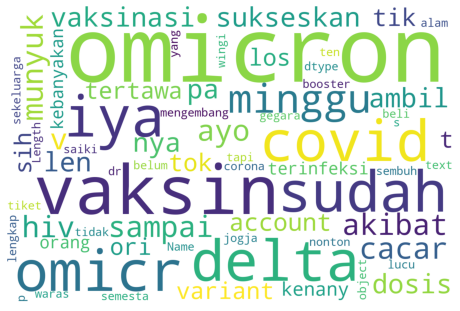

In [33]:
wordcloud = WordCloud(width = 1500, height = 1000, background_color = 'white'
                      , min_font_size = 20).generate(str(word_to_plot_positif))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('positif.png')
plt.show()

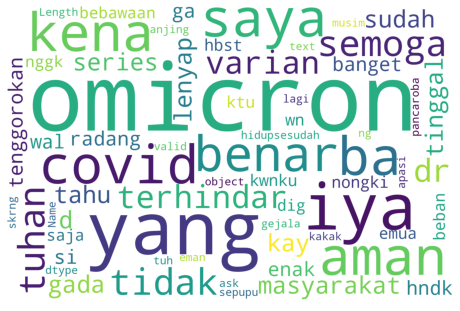

In [34]:
wordcloud = WordCloud(width = 1500, height = 1000, background_color = 'white'
                      , min_font_size = 20).generate(str(word_to_plot_negatif))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('negatif.png')
plt.show()

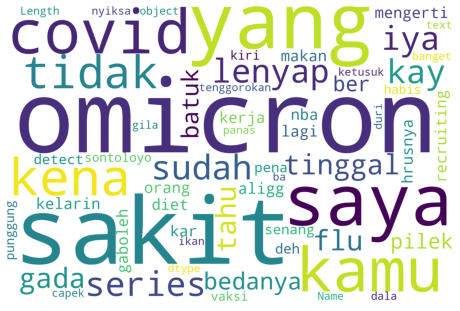

In [36]:
wordcloud = WordCloud(width = 1500, height = 1000, background_color = 'white'
                      , min_font_size = 20).generate(str(word_to_plot_pemerintah_negatif))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('pemerintah_negatif.png')
plt.show()


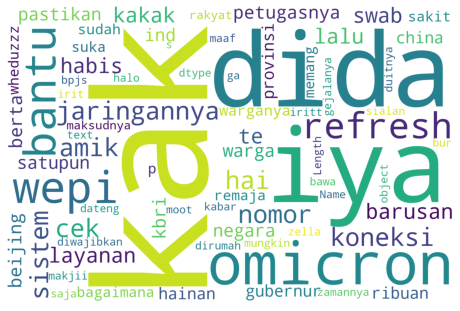

In [37]:
wordcloud = WordCloud(width = 1500, height = 1000, background_color = 'white'
                      , min_font_size = 20).generate(str(word_to_plot_pemerintah_positif))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('pemerintah_positif.png')
plt.show()

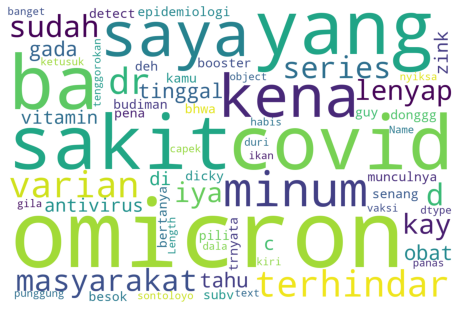

In [38]:
wordcloud = WordCloud(width = 1500, height = 1000, background_color = 'white'
                      , min_font_size = 20).generate(str(word_to_plot_pengobatan_negatif))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('pengobatan_negatif.png')
plt.show()


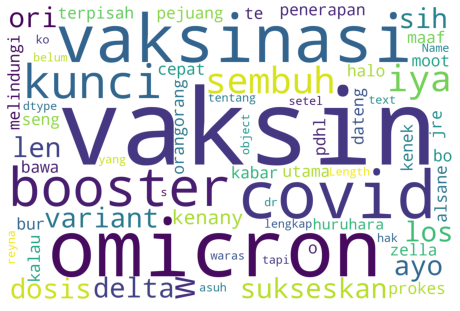

In [40]:
wordcloud = WordCloud(width = 1500, height = 1000, background_color = 'white'
                      , min_font_size = 20).generate(str(word_to_plot_pengobatan_positif))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('pengobatan_positif.png')
plt.show()
